<a href="https://colab.research.google.com/github/jonitorta/Ejercicios_Machine_learning./blob/main/Linear_class_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Linear Classifier.
In this notebook I'll implement a linear classifier with tensorflow.


In [1]:
#Main libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create 2000 random points 
N = 1000
first_class = list(zip(np.random.normal(loc = 0.1, scale = .1, size = N) ,  np.random.normal(loc = .1, scale = .1, size = N)))
second_class  = list(zip(np.random.normal(loc = 0.6, scale = .1, size = N) ,  np.random.normal(loc = .6, scale = .1, size = N)))
first_class = np.array(first_class)
second_class = np.array(second_class)

In [3]:
#Create the labels for each cat and stack all data vertically
data = np.vstack((first_class, second_class)).astype(np.float32)
labels = np.vstack((np.zeros(shape = (N,1) ) , np.ones(shape = (N,1) )) ).astype(np.float32)

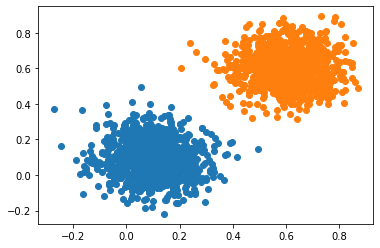

In [4]:
#Let's see how the data looks
plt.scatter(first_class[:,0], first_class[:,1])
plt.scatter(second_class[:,0], second_class[:,1])
plt.show()

In [5]:
def model(inputs):
  """
  Computes dot product with weights and add the bias
  """
  return tf.matmul(inputs, W) + b

In [6]:
def square_error(labels, predictions):
  """
  Computes the mean square error of predictions vs labels.
  """
  s_difference = tf.square(labels - predictions)
  return tf.reduce_mean(s_difference)

In [7]:
def fit(model, data, labels, error_metric, iterations, l_r = 0.5):
  """
  Compute gradient wrt weights and bias, then update weights and bias.
  """
  for iteration in range(iterations):
    with tf.GradientTape() as tape :
      predictions = model(data)
      error = error_metric(labels, predictions)
    gradient_W, gradient_b = tape.gradient(error, [W,b])
    print(f"The loss at iteration {iteration} is : {error}")
    W.assign_sub(gradient_W*l_r)
    b.assign_sub(gradient_b*l_r)

In [8]:
#Create the initial weight matrix and bias value
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [9]:
#Train the model
fit(model, data, labels, square_error, 40)

The loss at iteration 0 is : 0.07233873009681702
The loss at iteration 1 is : 0.04618335887789726
The loss at iteration 2 is : 0.039658717811107635
The loss at iteration 3 is : 0.03553874418139458
The loss at iteration 4 is : 0.03233062103390694
The loss at iteration 5 is : 0.029773017391562462
The loss at iteration 6 is : 0.027728132903575897
The loss at iteration 7 is : 0.02609151042997837
The loss at iteration 8 is : 0.02478029765188694
The loss at iteration 9 is : 0.023728540167212486
The loss at iteration 10 is : 0.022883644327521324
The loss at iteration 11 is : 0.0222037173807621
The loss at iteration 12 is : 0.021655388176441193
The loss at iteration 13 is : 0.02121204324066639
The loss at iteration 14 is : 0.02085249312222004
The loss at iteration 15 is : 0.020559830591082573
The loss at iteration 16 is : 0.0203205868601799
The loss at iteration 17 is : 0.0201240386813879
The loss at iteration 18 is : 0.019961630925536156
The loss at iteration 19 is : 0.019826550036668777
The 

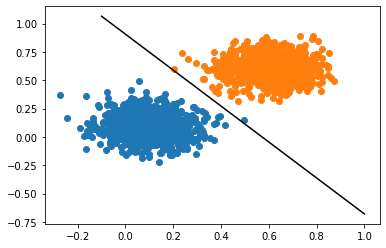

In [10]:
#Check the classification
x = np.linspace(-0.1, 1, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "black")
plt.scatter(first_class[:,0], first_class[:,1])
plt.scatter(second_class[:,0], second_class[:,1])
plt.show()